## Problem Statement : Classify incoming data for kyphosis occurence (yes/no)


https://stat.ethz.ch/R-manual/R-patched/library/rpart/html/kyphosis.html


* Kyphosis
****a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation.****


* Age - in months


* Number - the number of vertebrae involved


* Start - the number of the first (topmost) vertebra operated on.


#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

#### Importing dataset

In [2]:
df = pd.read_csv('dataset/kyphosis.csv')

df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


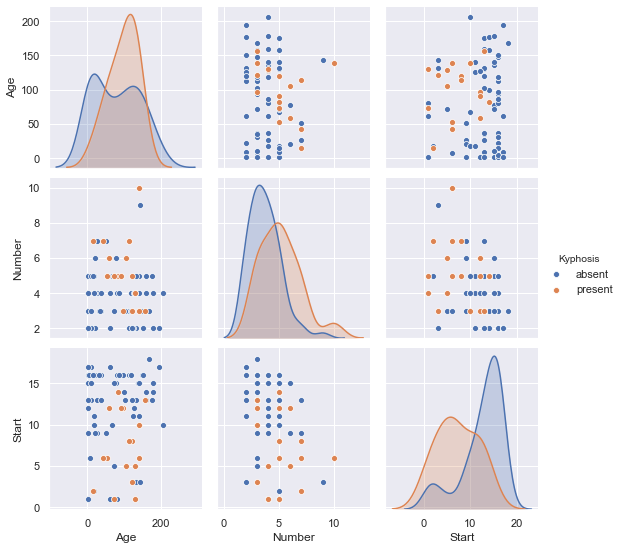

In [3]:
sns.pairplot(df,hue='Kyphosis')

### Train Test Split

In [4]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Training using a Decision Tree classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtree = DecisionTreeClassifier(max_depth=4)

In [8]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred_train = dtree.predict(X_train)

print(f'Training Accuracy : {accuracy_score(y_pred_train,y_train)}')
print(f'\n\nClassification Report:\n\n {classification_report(y_pred_train,y_train)}')
print(f'\n\nConfusion Matrix:\n {confusion_matrix(y_pred_train,y_train)}')

Training Accuracy : 0.9375


Classification Report:

               precision    recall  f1-score   support

      absent       0.94      0.98      0.96        48
     present       0.93      0.81      0.87        16

    accuracy                           0.94        64
   macro avg       0.93      0.90      0.91        64
weighted avg       0.94      0.94      0.94        64



Confusion Matrix:
 [[47  1]
 [ 3 13]]


In [10]:
y_pred = dtree.predict(X_test)

print(f'Testing Accuracy : {accuracy_score(y_pred,y_test)}')
print(f'\n\nClassification Report:\n\n {classification_report(y_pred,y_test)}')
print(f'\n\nConfusion Matrix:\n {confusion_matrix(y_pred,y_test)}')

Testing Accuracy : 0.7647058823529411


Classification Report:

               precision    recall  f1-score   support

      absent       0.86      0.86      0.86        14
     present       0.33      0.33      0.33         3

    accuracy                           0.76        17
   macro avg       0.60      0.60      0.60        17
weighted avg       0.76      0.76      0.76        17



Confusion Matrix:
 [[12  2]
 [ 2  1]]


In [11]:
import sklearn
print(sklearn.__version__)

!pip install sklearn==0.22

0.22.2.post1
  ERROR: Could not find a version that satisfies the requirement sklearn==0.22 (from versions: 0.0)
ERROR: No matching distribution found for sklearn==0.22


In [19]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

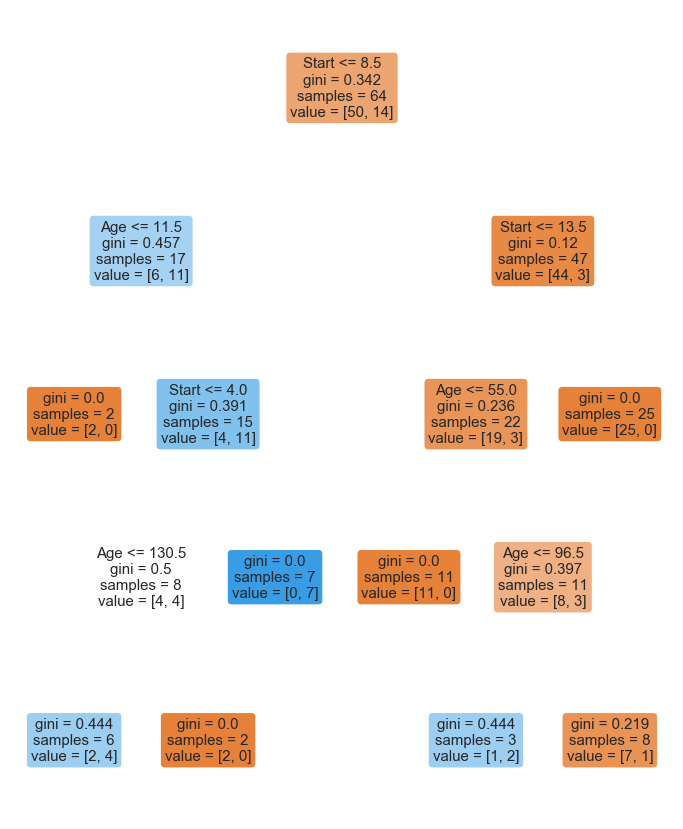

In [16]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,15))

a = plot_tree(dtree,
              filled=True,
              rounded=True,
              fontsize=15,
              feature_names=features)

In [17]:
!pip install pydot

In [18]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

/Users/vipulgaur/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [20]:
df.shape

(81, 4)

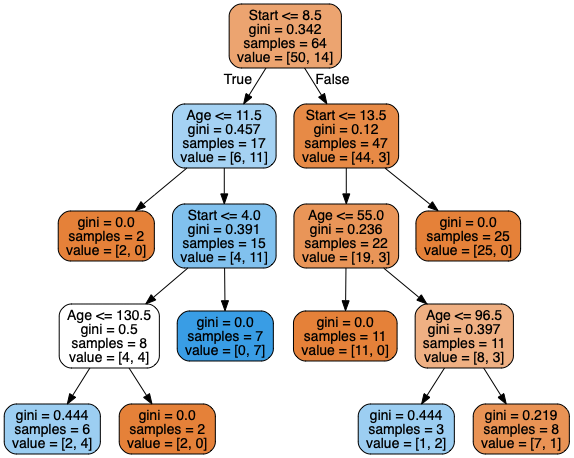

In [21]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# Great Job !